In [100]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import plotly

%matplotlib inline

In [51]:
 # Load .env enviroment variables
load_dotenv()

True

### Part 1 Personal Finance Planner

In [52]:
#Set current amount of crypto assets
avg_income = 12000
my_spy = 50
my_agg = 200
my_btc = 1.2
my_eth = 5.

shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [53]:
# Crypto URL's
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [54]:
# Fetch current BTC price
import json
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
print(json.dumps(btc_data, indent=4))
my_btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
                      
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()

 # print(json.dumps(eth_data,indent=4))
my_eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19002850,
            "total_supply": 19002850,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 46557.0,
                    "volume_24h": 29893728108,
                    "market_cap": 884046881002,
                    "percentage_change_1h": 0.745725553093591,
                    "percentage_change_24h": -0.218912956971032,
                    "percentage_change_7d": -0.338315608425757,
                    "percent_change_1h": 0.745725553093591,
                    "percent_change_24h": -0.218912956971032,
                    "percent_change_7d": -0.338315608425757
                },
                "CAD": {
                    "price": 58131.0702,
                    "volume_24h": 37325308915.6488,
               

In [55]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}") 

The current value of your 1.2 BTC is $46557.00
The current value of your 5.0 ETH is $3512.89


In [56]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")
print(type(alpaca_api_key))

<class 'str'>


In [57]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [58]:
# Format current date as ISO format
current_date = pd.Timestamp("2022-03-31", tz= "America/New_York").isoformat()

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_alpaca = alpaca.get_bars(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
    limit= 10000
).df

# Print sample data
df_alpaca.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-31 04:00:00+00:00,107.19,107.38,107.06,107.10,13788220,44817,107.229272,AGG
2022-03-31 04:00:00+00:00,457.92,458.76,451.16,452.11,118607132,751169,455.444107,SPY


In [59]:
# Reorganize
AGG = df_alpaca[df_alpaca["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_alpaca[df_alpaca["symbol"]=="SPY"].drop('symbol', axis=1)

#Concatenate the ticker dataframes and display
df_all = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
df_all.head()

AGG                                   \
                             open    high     low  close    volume   
timestamp                                                            
2022-03-31 04:00:00+00:00  107.19  107.38  107.06  107.1  13788220   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-31 04:00:00+00:00       44817  107.229272  457.92  458.76  451.16   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-03-31 04:00:00+00:00  452.11  118607132      751169  455.444107

In [60]:
# Current closing prices for both SPY and AGG
agg_price = float(df_all["AGG"]["close"])
spy_price = float(df_all["SPY"]["close"])

# Print AGG And SPY close prices
print(f"The current AGG closing price is: ${agg_price}")
print(f"The current SPY closing price is ${spy_price}")

The current AGG closing price is: $107.1
The current SPY closing price is $452.11


In [61]:
# Compute the current value of shares
agg_value = agg_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_price * df_shares.loc["SPY"]["shares"]

# Print the current value of the stock portfolio
print(f"The curent value of {my_agg} AGG shares is: {agg_value}")
print(f"The current value of {my_spy} SPY share is: {spy_value}")

The curent value of 200 AGG shares is: 21420.0
The current value of 50 SPY share is: 22605.5


### Savings Health Analysis

In [98]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
shares = agg_value + spy_value
savings = [["crypto", crypto], ["shares", shares]]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=["crypto", "shares"])
df_savings = df_savings.drop(columns=[0])
df_savings

,1
crypto,50069.89
shares,44025.50


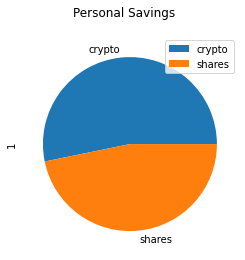

In [106]:
# Plot savings pie chart
plot = df_savings.plot.pie(subplots=True, title="Personal Savings")

In [97]:
emergency_fund = monthly_income *3
current_savings = float(df_savings.sum())

if current_savings > emergency_fund:
    print("Congrats, you have enough savings!") 
    
elif current_savings == emergency_fund:
    print("Congrats, you've met your financial goal!") 
    
else:
    print(f"You are ({emergency_fund} - {df_savings}) away from goal")

Congrats, you have enough savings!


### Monte Carlo

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-31', tz='America/New_York').isoformat()

In [44]:
###### Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop('symbol', axis=1)

df_all = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
df_all.head(20)

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-03-31 04:00:00+00:00  108.44  108.5300  108.4200  108.49  3717721   
2017-04-03 04:00:00+00:00  108.31  108.6800  108.3000  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.6500  108.5200  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.7400  108.4530  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.7100  108.4800  108.68  1725301   
2017-04-07 04:00:00+00:00  108.80  108.8900  108.4200  108.44  1783599   
2017-04-10 04:00:00+00:00  108.53  108.6500  108.4901  108.58  1903768   
2017-04-11 04:00:00+00:00  108.79  108.9800  108.7500  108.89  2200830   
2017-04-12 04:00:00+00:00  108.93  109.2000  108.8900  109.13  2432965   
2017-04-13 04:00:00+00:00  109.25  109.3900  109.1300  109.27  2339939   
2017-04-17 04:00:00+00:00  109.30  109.4000  109.1800  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.7000  109.3900  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.5600  109.3900  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.4000  109.2000  109.31  1867805   
2017-04-21 04:00:00+00:00  109.40  109.4899  109.3000  109.34  1539265   
2017-04-24 04:00:00+00:00  109.05  109.2200  109.0000  109.18  2745689   
2017-04-25 04:00:00+00:00  108.99  109.0450  108.7700  108.82  1888469   
2017-04-26 04:00:00+00:00  108.85  108.9700  108.7700  108.96  2893801   
2017-04-27 04:00:00+00:00  108.94  109.1000  108.9100  109.06  1660940   
2017-04-28 04:00:00+00:00  108.98  109.2500  108.9100  109.25  5774846   

                                                      SPY                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2017-03-31 04:00:00+00:00       13532  108.485913  235.91  236.510  235.6800   
2017-04-03 04:00:00+00:00       15992  108.605513  235.79  236.030  233.9100   
2017-04-04 04:00:00+00:00        8325  108.591265  235.00  235.580  234.5550   
2017-04-05 04:00:00+00:00       11167  108.599103  236.26  237.390  234.5400   
2017-04-06 04:00:00+00:00        7746  108.588276  234.96  236.040  234.4250   
2017-04-07 04:00:00+00:00        8534  108.645684  235.18  236.000  234.6400   
2017-04-10 04:00:00+00:00       12236  108.566615  235.36  236.255  234.7300   
2017-04-11 04:00:00+00:00       11420  108.874603  234.90  235.180  233.3400   
2017-04-12 04:00:00+00:00       10372  109.013960  234.80  234.960  233.7700   
2017-04-13 04:00:00+00:00       13465  109.262713  233.65  234.490  232.5100   
2017-04-17 04:00:00+00:00        7973  109.294030  233.12  234.570  232.8800   
2017-04-18 04:00:00+00:00       14488  109.579396  233.71  234.490  233.0800   
2017-04-19 04:00:00+00:00        9587  109.455386  234.52  234.950  233.1800   
2017-04-20 04:00:00+00:00        7319  109.301387  234.14  235.845  233.7800   
2017-04-21 04:00:00+00:00        8708  109.386803  235.22  235.310  234.1300   
2017-04-24 04:00:00+00:00       10549  109.150827  237.17  237.410  234.5628   
2017-04-25 04:00:00+00:00       10064  108.912429  237.93  238.950  237.8100   
2017-04-26 04:00:00+00:00       10145  108.884769  238.53  239.530  238.3500   
2017-04-27 04:00:00+00:00        7367  109.026595  238.74  238.950  237.9800   
2017-04-28 04:00:00+00:00       11215  109.197005  238.93  238.930  237.9300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-03-31 04:00:00+00:00  235.74   73733094      207326  236.011666  
2017-04-03 04:00:00+00:00  235.33   85546486      278486  235.194832  
2017-04-04 04:00:00+00:00  235.48   56466195      192579  235.237449  
2017-04-05 04:00:00+00:00  234.78  108800604      363080  23

In [47]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear=MCSimulation(
    portfolio_data = df_all,
    weights=[.40,.60],
    num_simulation = 500,
    num_trading_days= 252*30,
)

# Print the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-03-31 04:00:00+00:00  108.44  108.53  108.420  108.49  3717721   
2017-04-03 04:00:00+00:00  108.31  108.68  108.300  108.67  5198006   
2017-04-04 04:00:00+00:00  108.61  108.65  108.520  108.57  1627492   
2017-04-05 04:00:00+00:00  108.48  108.74  108.453  108.69  2304074   
2017-04-06 04:00:00+00:00  108.64  108.71  108.480  108.68  1725301   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-31 04:00:00+00:00       13532  108.485913          NaN  235.91   
2017-04-03 04:00:00+00:00       15992  108.605513     0.001659  235.79   
2017-04-04 04:00:00+00:00        8325  108.591265    -0.000920  235.00   
2017-04-05 04:00:00+00:00       11167  108.599103     0.001105  236.26   
2017-04-06 04:00:00+00:00        7746  108.588276    -0.000092  234.96   

                                                                           \
                             high      low   close     volume trade_count   
timestamp                                                                   
2017-03-31 04:00:00+00:00  236.51  235.680  235.74   73733094      207326   
2017-04-03 04:00:00+00:00  236.03  233.910  235.33   85546486      278486   
2017-04-04 04:00:00+00:00  235.58  234.555  235.48   56466195      192579   
2017-04-05 04:00:00+00:00  237.39  234.540  234.78  108800604      363080   
2017-04-06 04:00:00+00:00  236.04  234.425  235.44   69135757      244996   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-31 04:00:00+00:00  236.011666          NaN  
2017-04-03 04:00:00+00:00  235.194832    -0.001739  
2017-04-04 04:00:00+00:00  235.237449     0.000637  
2017-04-05 04:00:00+00:00  235.933657    -0.002973  
2017-04-06 04:00:00+00:00  235.287745     0.002811

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 110.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 120.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 130.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 140.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 150.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 160.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 170.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 180.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 190.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 200.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 210.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 220.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 230.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 240.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 250.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 260.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 270.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 280.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 290.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 300.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 310.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 320.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 330.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 340.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 350.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 360.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 370.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 380.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 390.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 400.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 410.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 420.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 430.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 440.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 450.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 460.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 470.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 480.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

Running Monte Carlo simulation number 490.


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-F

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999816,0.995505,1.001220,0.999984,1.005273,0.999962,1.003294,1.009575,1.013097,0.999249,...,0.995843,1.003658,1.012188,0.994930,1.003540,0.993790,0.990891,1.004043,1.003168,0.993889
2,1.000037,1.004349,0.998643,1.005294,1.014970,0.992369,0.992414,1.016108,1.017239,0.997220,...,0.986955,1.006717,1.007706,0.990480,1.004661,0.998209,0.992372,0.992673,1.003317,0.981984
3,0.993515,1.001216,0.997865,1.010470,1.010456,0.985078,0.986732,1.009526,1.022492,1.002113,...,0.987543,1.007749,1.013992,0.987023,0.997598,0.996833,0.985107,0.997423,1.011150,0.972869
4,0.986923,0.989259,1.000523,1.024083,1.011732,0.988400,0.985505,1.003245,1.030793,0.991696,...,0.978594,1.015859,1.016697,0.993197,0.996676,0.992201,0.979380,1.007628,1.015437,0.967422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.021761,11.207518,9.108590,5.576458,6.147534,14.524237,13.704498,8.444139,22.297094,23.324534,...,9.889877,14.385127,4.137243,14.706343,5.963092,13.112719,12.945872,7.527303,9.267991,4.600299
7557,4.083830,11.254136,9.101639,5.582970,6.171171,14.362539,13.693235,8.496491,22.153771,23.297847,...,9.803590,14.442956,4.167506,14.755031,5.944073,13.126303,12.999215,7.534447,9.182569,4.603975
7558,4.059181,11.340372,9.092543,5.546693,6.154346,14.321611,13.738091,8.480961,22.173840,23.445131,...,9.857023,14.407979,4.190089,14.822076,6.025880,13.155931,13.191096,7.603383,9.089073,4.687274
7559,4.067179,11.325504,9.015635,5.546772,6.192045,14.364853,13.781049,8.497398,21.969418,23.565455,...,9.998006,14.318260,4.168634,14.799951,6.004822,13.075537,13.286078,7.601512,9.105761,4.636342


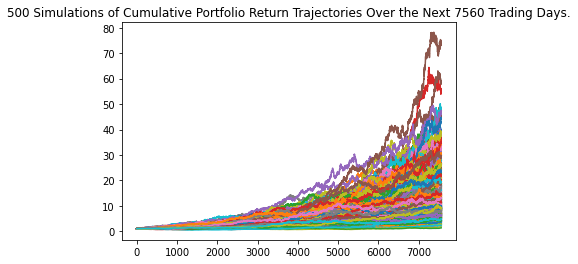

In [68]:
# Plot simulation outcomes
plot_thirtyyear = MC_thirtyyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

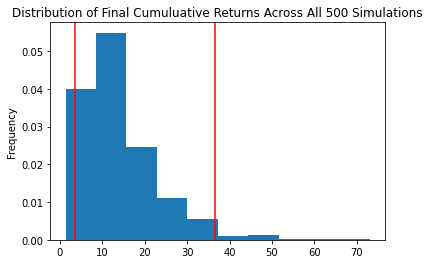

In [69]:
# Plot probability distribution and confidence intervals
MC_thirtyyear.plot_distribution()

In [70]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.196885
std               9.266577
min               1.328582
25%               8.140820
50%              11.505954
75%              18.025583
max              73.104753
95% CI Lower      3.674650
95% CI Upper     36.479853
Name: 7560, dtype: float64


C:\Users\rache\Documents\Fintech Practice - Jupyter\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [72]:
#  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $73493.0 and $729597.05


In [73]:
# Set initial investment
#  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $110239.51 and $1094395.58
